Dominant frequency: 256.37969970703125 Hz
Dominant magnitude: 1.0
Peak frequencies: [258.14609528 259.66014862 256.37969971] Hz
Peak magnitudes: [0.85539869 0.91527874 1.        ]
Spectral centroid: 3900.0244151705 Hz
Spectral bandwidth: 3992.3297693951154 Hz


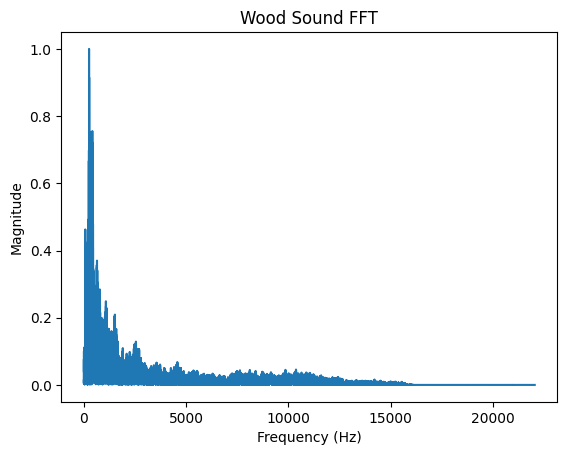

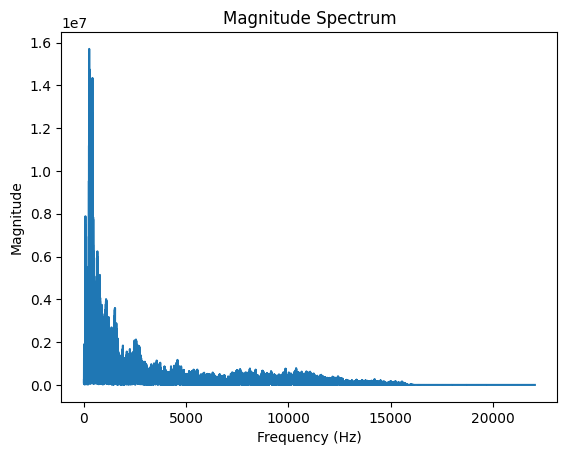

Spectral centroid: 3900.7649159651887 Hz
Spectral rolloff: 4991.806164805685 Hz
Spectral flux: 2.8853071796903412e+16
Zero crossing rate: 0.03407092879930394


<Figure size 1000x400 with 0 Axes>

In [ ]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load audio file
rate, data = wav.read('Wood2.wav')

# Convert audio to mono and normalize
if data.ndim > 1:
    data = np.mean(data, axis=1)
data = data / np.max(np.abs(data))

# Apply window to audio data
window = np.hanning(len(data))
data = data * window

# Perform FFT
fft_size = 2 ** int(np.ceil(np.log2(len(data))))
fft_data = np.fft.fft(data, fft_size)
freqs = np.fft.fftfreq(fft_size, 1/rate)[:int(fft_size/2)]

# Calculate magnitude spectrum
magnitude = np.abs(fft_data)[:int(fft_size/2)]
magnitude = magnitude / np.max(magnitude)

# Find dominant frequency
max_index = np.argmax(magnitude)
dominant_freq = freqs[max_index]
dominant_mag = magnitude[max_index]

# Find peak frequencies
n_peaks = 3
peak_indices = np.argsort(magnitude)[-n_peaks:]
peak_freqs = freqs[peak_indices]
peak_mags = magnitude[peak_indices]

# Find spectral centroid
spectral_centroid = np.sum(freqs * magnitude) / np.sum(magnitude)

# Find spectral bandwidth
spectral_bandwidth = np.sqrt(np.sum(((freqs - spectral_centroid) ** 2) * magnitude) / np.sum(magnitude))

# Print analysis results
print("Dominant frequency:", dominant_freq, "Hz")
print("Dominant magnitude:", dominant_mag)
print("Peak frequencies:", peak_freqs, "Hz")
print("Peak magnitudes:", peak_mags)
print("Spectral centroid:", spectral_centroid, "Hz")
print("Spectral bandwidth:", spectral_bandwidth, "Hz")

# Plot frequency spectrum
plt.plot(freqs[:int(fft_size/2)], magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Wood Sound FFT')
plt.show()

# Load audio file
sample_rate, stereo_signal = wav.read('Wood2.wav')
signal = np.mean(stereo_signal, axis=1) # Convert to mono

# Apply Hanning window
window = np.hanning(len(signal))
signal = signal * window

# Apply FFT
spectrum = np.fft.fft(signal)

# Calculate magnitude spectrum
mag_spectrum = np.abs(spectrum[:len(signal) // 2 + 1])

# Calculate frequency bins
freq_bins = np.arange(len(signal) // 2 + 1) * (sample_rate / len(signal))

# Plot magnitude spectrum
plt.figure()
plt.plot(freq_bins, mag_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.show()
plt.figure(figsize=(10, 4))

# Calculate spectral centroid
spectral_centroid = np.sum(freq_bins * mag_spectrum) / np.sum(mag_spectrum)

# Calculate spectral rolloff
total_energy = np.sum(mag_spectrum ** 2)
spectral_energy = 0.95 * total_energy
cumulative_energy = np.cumsum(mag_spectrum ** 2)
spectral_rolloff = np.argmax(cumulative_energy >= spectral_energy)

# Calculate spectral flux
spectral_flux = np.sum((mag_spectrum[1:] - mag_spectrum[:-1]) ** 2)

# Calculate zero crossing rate
zcr = np.sum(np.diff(np.sign(signal)) != 0) / len(signal)

# Print features
print('Spectral centroid:', spectral_centroid, 'Hz')
print('Spectral rolloff:', freq_bins[spectral_rolloff], 'Hz')
print('Spectral flux:', spectral_flux)
print('Zero crossing rate:', zcr)

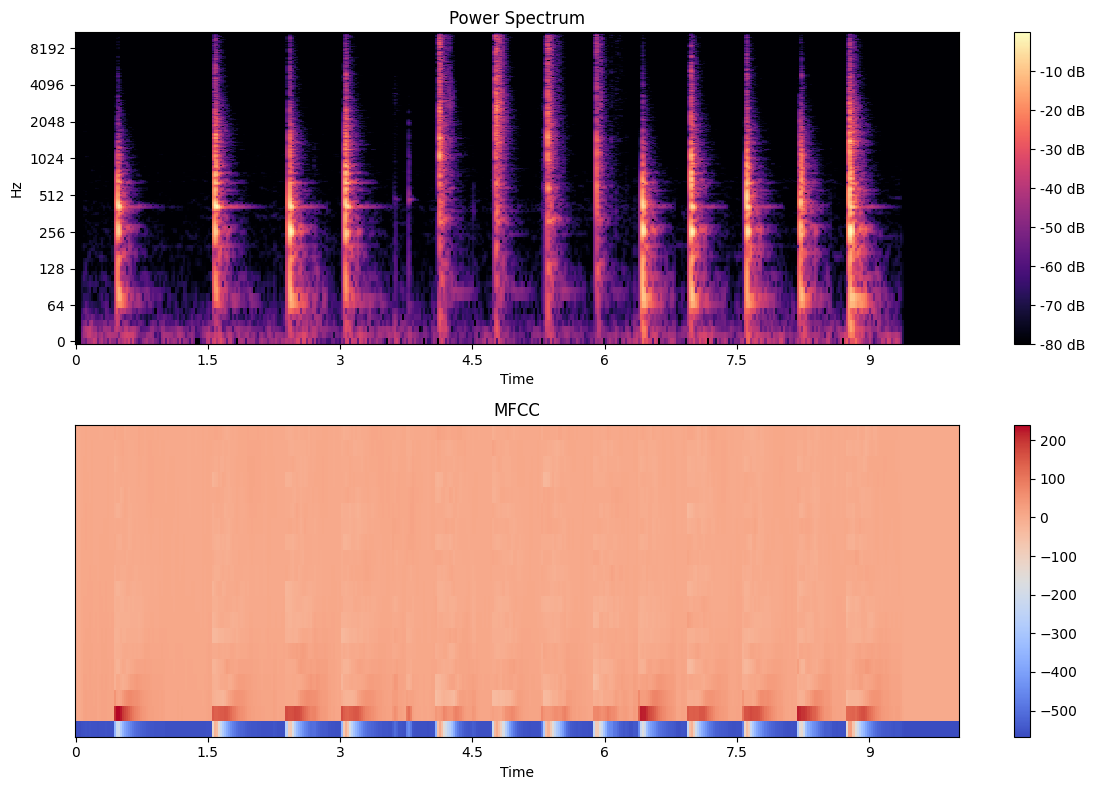

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load audio file of wooden plate
audio_file = 'Wood2.wav'
y, sr = librosa.load(audio_file)

# Get the spectrogram of the audio file
spectrogram = librosa.stft(y)

# Compute the power spectrum of the audio file
power_spectrum = np.abs(spectrogram) ** 2

# Compute the mel-frequency cepstral coefficients (MFCCs) of the audio file
mfcc = librosa.feature.mfcc(y=y, sr=sr)

# Plot the power spectrum and MFCCs
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(power_spectrum, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power Spectrum')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc, x_axis='time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()


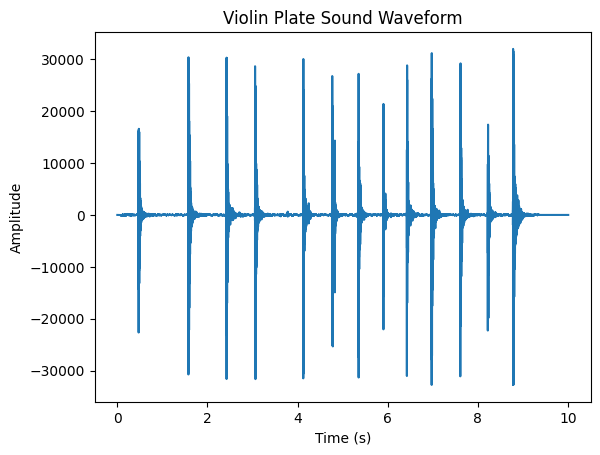

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


ValueError: ignored

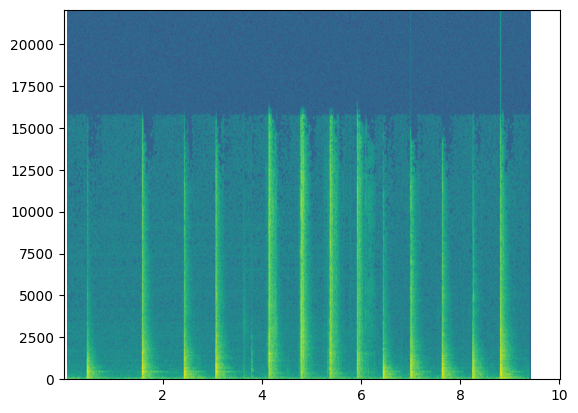

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Load the sound file
fs, data = wavfile.read('Wood2.wav')

# Extract the left channel if stereo
if len(data.shape) > 1:
    data = data[:, 0]

# Calculate the time vector
time = np.arange(len(data)) / float(fs)

# Plot the waveform
plt.plot(time, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Violin Plate Sound Waveform')
plt.show()

# Calculate the spectrogram
N = 1024
window = np.hanning(N)
noverlap = N // 2
f, t, Sxx = plt.specgram(data, NFFT=N, Fs=fs, window=window, noverlap=noverlap)

# Plot the spectrogram
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Violin Plate Sound Spectrogram')
plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define the directory path
dir_path = '/content/drive/MyDrive'

# Change the current working directory to the defined path
os.chdir(dir_path)

# Verify that the current working directory has been changed
print(os.getcwd())


/content/drive/MyDrive


In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models, layers
# Keras is a high-level neural networks API written in Python. Will save us from writing complex algorithms from scratch

# Set the directory paths for the good and bad sounds
good_sounds_dir = '/content/drive/MyDrive/GoodSounds'
bad_sounds_dir = '/content/drive/MyDrive/Bad_sounds'

# Set the parameters for loading the sound files
# Sampling rate and Durations of our files
sr = 44100   #22.05 Khz
duration = 5

# Initialize empty lists for the good and bad sounds
good_sounds = []
bad_sounds = []


# Load the good sounds and extract MFCC features
# Mel-Frequency Cepstral coefficients
for filename in os.listdir(good_sounds_dir):
    if filename.endswith('.wav'):
        filepath = os.path.join(good_sounds_dir, filename)
        sound, _ = librosa.load(filepath, sr=sr, duration=duration)
        mfcc = librosa.feature.mfcc(y=sound, sr=sr, n_mfcc=20)
        good_sounds.append(mfcc)

# Load the bad sounds and extract MFCC features
for filename in os.listdir(bad_sounds_dir):
    if filename.endswith('.wav'):
        filepath = os.path.join(bad_sounds_dir, filename)
        sound, _ = librosa.load(filepath, sr=sr, duration=duration)
        mfcc = librosa.feature.mfcc(y=sound, sr=sr, n_mfcc=20)
        bad_sounds.append(mfcc)

# Encode the labels as integers
# this we do to because ML models require labels in integers for computation
label_encoder = LabelEncoder()
labels = ['good'] * len(good_sounds) + ['bad'] * len(bad_sounds)
labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
# 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(good_sounds + bad_sounds, labels, test_size=0.2, random_state=42)

# Convert the features to numpy arrays and reshape them for input layer of the models
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape the features for the input layer of the model
X_train = X_train.reshape((*X_train.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

# Define the architecture of the model
# sequentially adds layers to the model object

#These filters are essentially learnable parameters that the neural network trains during the training process,
# and each filter is a small matrix of weights that is applied to small patches of the input data.
#The filters themselves don't have names as they are learned by the neural network,
#but they can be visualized as images to gain an understanding of what kind of features they are capturing. For example,
#some filters may be detecting edges or corners, while others may be capturing more complex patterns such as curves or textures.

model = models.Sequential([
    # Convolution with the given filters
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]), #layer with 32 filters, each with a 3x3 kernel, and ReLU activation function f=max(0,x).
    layers.MaxPooling2D((2, 2)),                                                 #layer with a pool size of 2x2, which reduces the spatial dimensions of the output from the previous layer by a factor of 2.
    layers.Conv2D(64, (3, 3), activation='relu'),                                #Another Conv2D layer with 64 filters, each with a 3x3 kernel, and ReLU activation function.
    layers.MaxPooling2D((2, 2)),                                                 #same as line 2
    layers.Flatten(),                                                            #which flattens the output from the previous layer into a 1D vector.
    layers.Dense(64, activation='relu'),                                         #layer with 64 units and ReLU activation function.
    layers.Dense(1, activation='sigmoid')                                        #outputs a probability between 0 and 1 representing the predicted class label
])


#the goal of using the MFCCs as input to the CNN model is to learn a set of filters
#that can automatically extract useful features from the audio signals that can be used to classify them as either "good" or "bad" sounds




# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Load a test sound file and extract features
test_sound, _ = librosa.load('Wood2.wav', sr=sr, duration=duration)
test_mfcc = librosa.feature.mfcc(y=test_sound, sr=sr, n_mfcc=20)

# Reshape the features for the input layer of the model
test_mfcc = np.reshape(test_mfcc, (1, 20, 216, 1))

# Make a prediction on the test sound file
prediction = model.predict(test_mfcc)

# # Decode the predicted label
# predicted_label = np.argmax(prediction, axis=1)

# print('Predicted label:', label_names[predicted_label[0]])

# Decode the predicted label
predicted_label = label_encoder.inverse_transform([int(prediction)])[0]

print(f'The predicted label for the test sound file is {predicted_label}.')
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Print the accuracy of the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)



Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 21.4007 - accuracy: 0.0000e+00 - val_loss: 87.3118 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 132.5135 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 167.4954 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 196.5011 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 221.3088 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 243.1138 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_l